<a href="https://colab.research.google.com/github/imsaurabhkr/NLP_work/blob/main/CIFAR_GAN_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# example of loading the cifar10 dataset
from keras.datasets.cifar10 import load_data
# load the images into memory
(trainX, trainy), (testX, testy) = load_data()
# summarize the shape of the dataset
print('Train', trainX.shape, trainy.shape)
print('Test', testX.shape, testy.shape)

170498071/170498071 [==============================] - 6s 0us/step
Train (50000, 32, 32, 3) (50000, 1)
Test (10000, 32, 32, 3) (10000, 1)


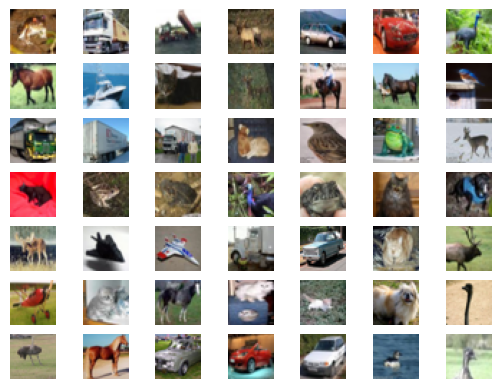

In [ ]:
# example of loading and plotting the cifar10 dataset
from keras.datasets.cifar10 import load_data
from matplotlib import pyplot
# load the images into memory
(trainX, trainy), (testX, testy) = load_data()
# plot images from the training dataset
for i in range(49):
	# define subplot
	pyplot.subplot(7, 7, 1 + i)
	# turn off axis
	pyplot.axis('off')
	# plot raw pixel data
	pyplot.imshow(trainX[i])
pyplot.show()

# Our discriminator take image of 32* 32* 3 and predict it whether real or fake(binary classification problem) .
NOTE :
1. use of LeakyReLu instead of ReLu
2. use DropOut
3. use Adam version of SGD
 # Structure for Convolution Layer
1. Normal convoultion layer
2. Followed by 3 convolution layer with stride of 2 to downsample. here is No pooling layer present
3. Finally A single node in ouput with sigmoid activation to predict whether real or fake

In [ ]:
pip install keras-utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras-utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2631 sha256=e239e93a1480a6cca2f4d4870c617b41321dad829173cf8e3c36db027e49879b
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras-utils


In [ ]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from tensorflow.keras.utils import plot_model


In [ ]:
# define the standalone discriminator model
def define_discriminator(in_shape=(32,32,3)):
	model = Sequential()
	# normal
	model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))    # 32*32*64
	model.add(LeakyReLU(alpha=0.2))
	# downsample
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))          # 16*16*128
	model.add(LeakyReLU(alpha=0.2))
	# downsample
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))          # 8*8*128
	model.add(LeakyReLU(alpha=0.2))
	# downsample
	model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))          # 4*4*256
	model.add(LeakyReLU(alpha=0.2))
	# classifier
	model.add(Flatten())
	model.add(Dropout(0.4))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 256)         2

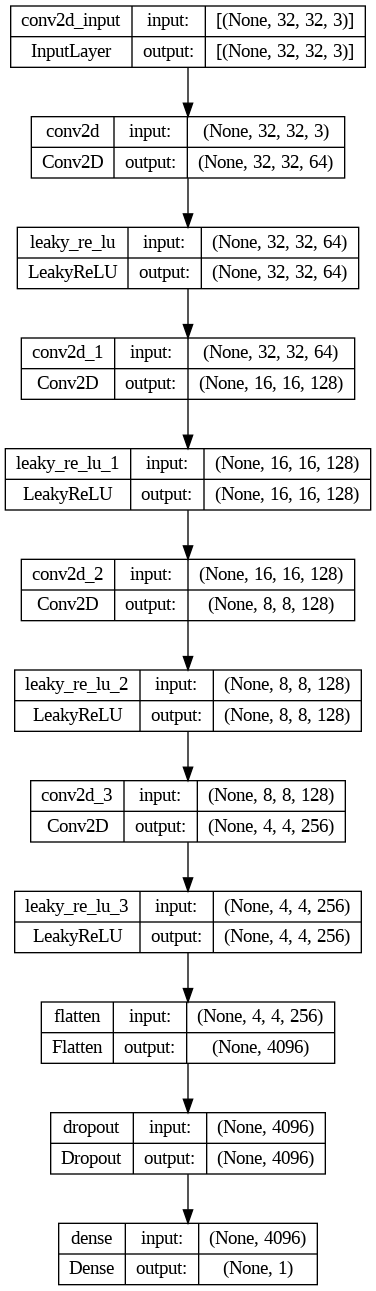

In [ ]:
# define model
model = define_discriminator()
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

Disciminator is simple binary classification neural network , expect input image and ouput a single value between o and 1

In [ ]:
...
# load cifar10 dataset
(trainX, _), (_, _) = load_data()

In [ ]:
# load and prepare cifar10 training images
def load_real_samples():
	# load cifar10 dataset
	(trainX, _), (_, _) = load_data()
	# convert from unsigned ints to floats
	X = trainX.astype('float32')
	# scale from [0,255] to [-1,1]
	X = (X - 127.5) / 127.5
	return X

now, we have total 10k train data but we train model on batch wise , so that generate_real_sample does , u passs n_sample which u want and it will return


In [ ]:
# select real samples
import numpy as np
from numpy import zeros
from numpy import ones
from numpy.random import rand
# generate real samples
import random
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = np.random.randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, 1))
	return X, y

In [ ]:
X=load_real_samples()
print(X.shape)
X,y=generate_real_samples(X,64)
print(X.shape)
print(y.shape)

(50000, 32, 32, 3)
(64, 32, 32, 3)
(64, 1)


Now we generate fake images

In [ ]:
# generate n fake samples with class labels
def generate_fake_samples(n_samples):
	# generate uniform random numbers in [0,1]
	X = rand(32 * 32 * 3 * n_samples)
	# update to have the range [-1, 1]
	X = -1 + X * 2
	# reshape into a batch of color images
	X = X.reshape((n_samples, 32, 32, 3))
	# generate 'fake' class labels (0)
	y = zeros((n_samples, 1))            # zeros bczo we are genearting fake image
	return X, y

In [ ]:
X,y=generate_fake_samples(64)
print(X.shape)
print(y.shape)
print(y[:10])

(64, 32, 32, 3)
(64, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


So Here , We generate fake image manually . now we want generator to create that fake image and then discriminator have to identify between real and fake

In [ ]:
# train the discriminator model
def train_discriminator(model, dataset, n_iter=20, n_batch=128):
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_iter):
		# get randomly selected 'real' samples
		X_real, y_real = generate_real_samples(dataset, half_batch)
		# update discriminator on real samples
		_, real_acc = model.train_on_batch(X_real, y_real)
		# generate 'fake' examples
		X_fake, y_fake = generate_fake_samples(half_batch)
		# update discriminator on fake samples
		_, fake_acc = model.train_on_batch(X_fake, y_fake)
		# summarize performance
		print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

The train_discriminator() function implements this, using a batch size of 128 images, where 64 are real and 64 are fake each iteration.
The best practice is to update the discriminator with separate batches of real and fake images rather than combining real and fake images into a single batch.

This can be achieved by updating the model weights for the discriminator model with two separate calls to the train_on_batch() function.

So basically in one iteration two time weight update , one time weight update due to Real image and another time for fake image

In [ ]:
# define the discriminator model
model = define_discriminator()
# load image data
dataset = load_real_samples()
# fit the model
train_discriminator(model, dataset)

>1 real=70% fake=0%
>2 real=100% fake=2%
>3 real=100% fake=28%
>4 real=98% fake=100%
>5 real=100% fake=100%
>6 real=98% fake=100%
>7 real=95% fake=100%
>8 real=100% fake=100%
>9 real=100% fake=100%
>10 real=100% fake=100%
>11 real=100% fake=100%
>12 real=100% fake=100%
>13 real=100% fake=100%
>14 real=100% fake=100%
>15 real=100% fake=100%
>16 real=100% fake=100%
>17 real=100% fake=100%
>18 real=100% fake=100%
>19 real=100% fake=100%
>20 real=100% fake=100%


# How to define Generator Model and Use it  


*   input : Point in latent space, e.g. a 100-element vector of Gaussian random numbers
*   output: Two-dimensional square color image (3 channels) of 32 x 32 pixels with pixel values in [-1,1].

Output of Generator will be the input for Discriminator , that's why Remember in Discriminator original image pixel value [0,255] convert into [-1,1] , bcoz eventually we use **tanh** activation for Discriminator.



In [ ]:
# example of defining the generator model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from tensorflow.keras.utils import plot_model


Actually Generator form image using latent space , so first layer is our dense layer , so how much will be the nodes in it ?

Ans: for this our original image is 32 * 32 ,, then node can be divisor of org , so can be 32 * 32 , 16 * 16, 4 * 4, by experiment **4*4** will give better result .

Now we will try to create multiple image of 4* 4 bcoz we want to capture maximum representation of our original feature , it may be that first image capture eye related feature , second related to nose and so on . That's why node size for dense layers is 4 * 4 * 256. Here we will create 256 images and capture feature

Intuition is start with low resolution image and upscale it

In [ ]:
# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 4x4 image
	n_nodes = 256 * 4 * 4
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((4, 4, 256)))   # convert into standard notation Height*weight*color_channel
	# upsample to 8x8
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')) # 8*8*128
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 16x16
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))  # 16*16*128
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 32x32
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')) # gives output of 32*32*128. ->128 is no of kernel
	model.add(LeakyReLU(alpha=0.2))
	# output layer
	model.add(Conv2D(3, (3,3), activation='tanh', padding='same')) # gives output of 32*32*3 (our required org image )  -> 3 is no of kernel
	return model

**Layers in Generator**
1. Dense layer of 4 * 4 * 256
2. Followed by 3 conv2DTranspose layer, for **upsampling** for converting into our required original size 32 * 32 * 3
3. Simple Conv2D layer with activation **tanh**

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4096)              413696    
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 4096)              0         
                                                                 
 reshape (Reshape)           (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 8, 8, 128)         524416    
 anspose)                                                        
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 16, 16, 128)       262272    
 Transpose)                                           

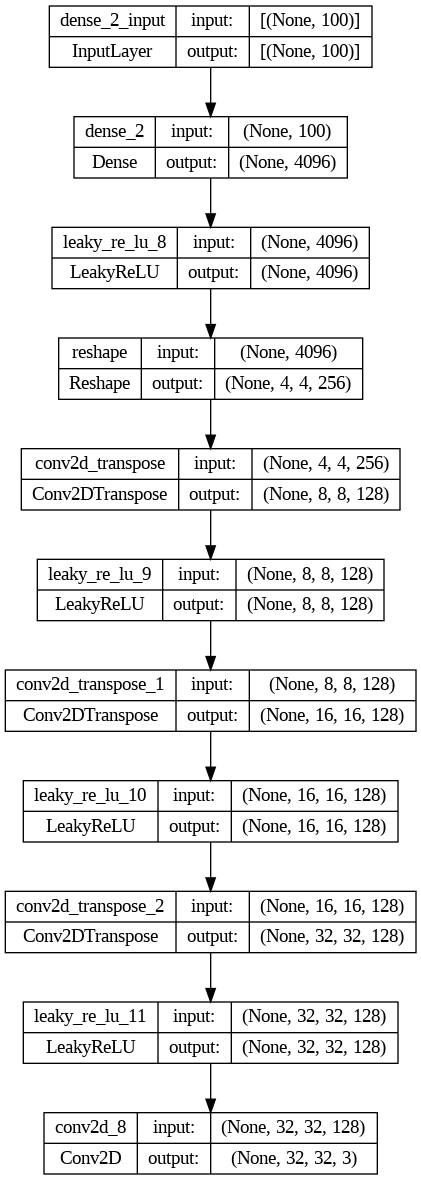

In [ ]:
# define the size of the latent space
latent_dim = 100
# define the generator model
model = define_generator(latent_dim)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

Now we have seen that if we pass 100 latent point to generator , it will give a single image of 32* 32* 3 ,, now in Discriminator we know we pass batch size of 128 , in which 64 are real images and 64 are fake images . So , we will now try to create a func which will give us 64 fake images so we can pass it to discriminator

In [ ]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = np.random.randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

In [ ]:
X_input= generate_latent_points(100,64)
print(X_input.shape)

(64, 100)


Here the scene is We will give Generator 64 images of 100 dimension and it will give us 64 images of 32 * 32 *3 AND then this 64 fake image will pass to discriminator and train the discriminator

**Generate fake samples using Generator**

In [ ]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = g_model.predict(x_input)  # x_input is 64 image of 100 dimension  ANd X is 64 image of 32*32*3
	# create 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y

2/2 [==============================] - 0s 104ms/step


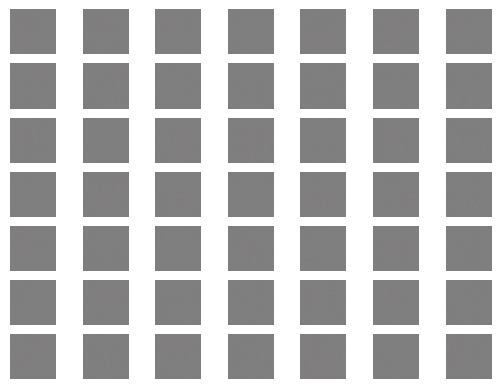

In [ ]:
# size of the latent space
latent_dim = 100
# define the discriminator model
model = define_generator(latent_dim)
# generate samples
n_samples = 49
X, _ = generate_fake_samples(model, latent_dim, n_samples)
# scale pixel values from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the generated samples
for i in range(n_samples):
 # define subplot
 pyplot.subplot(7, 7, 1 + i)
 # turn off axis labels
 pyplot.axis('off')
 # plot single image
 pyplot.imshow(X[i])
# show the figure
pyplot.show()

Till Now , we havnt trained Generator that's why we didn't get anything in above output

Now we have Discriminator and Generator , Now we have to train both

# Points to be Noted while building complete Adversial Network
1. we dont train Discriminator , only train generator
2. while building , we show image generated by Genearator as **REAL** while passing to discriminator . Bcoz we want to minimize loss ,see geneator always give label 1 to discriminator , but if always 1 , then how minimize loss bcoz your discriminator is trained , it will identify it as 0 then how will minimize loss ? so we have to adjust weight of generator in such a way that it will generate a just like real image so that it can actually fool discriminator .
So in a way , generator have to learn in such a way that it will generate real like image to fool discriminator

**Now Question is how discriminator know this is real or fake image ?**

1. in each epoch , we will pass 128 batch out of which 64 real and 64 fake . Now train Discriminator with 64 real image (update weight) , and then train weight of discriminator with 64 fake image. Means in one epoch , we update weight of Discriminator **two times**
2. Now after training Discriminator , we will train Generator . During this we will not train Discriminator weight , only train generator (update weight of generator).

The whole idea is first discriminator will learn a liitle , then generator will learn a little , then again discriminator will learn more so generator will also learn more .. both learning happens in a parallel way . We can't train discriminator completely at initial level bcoz then generator can never fool it bcoz discriminator then will be very powerful ..



In [ ]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(g_model)
	# add the discriminator
	model.add(d_model)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 32, 32, 3)         1466115   
                                                                 
 sequential_4 (Sequential)   (None, 1)                 522497    
                                                                 
Total params: 1988612 (7.59 MB)
Trainable params: 1466115 (5.59 MB)
Non-trainable params: 522497 (1.99 MB)
_________________________________________________________________


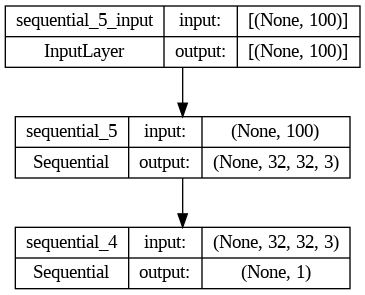

In [ ]:
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# summarize gan model
gan_model.summary()
# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=200, n_batch=128):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			X_real, y_real = generate_real_samples(dataset, half_batch)
			# update discriminator model weights
			d_loss1, _ = d_model.train_on_batch(X_real, y_real)
			# generate 'fake' examples
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# update discriminator model weights
			d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
			# prepare points in latent space as input for the generator
			X_gan = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
				(i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
	if (i+1) % 10 == 0:
		summarize_performance(i, g_model, d_model, dataset, latent_dim)

**Evaluation of Model**

In [ ]:
# create and save a plot of generated images
def save_plot(examples, epoch, n=7):
	# scale from [-1,1] to [0,1]
	examples = (examples + 1) / 2.0
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i])
	# save plot to file
	filename = 'generated_plot_e%03d.png' % (epoch+1)
	pyplot.savefig(filename)
	pyplot.close()

In [ ]:
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=150):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	# save plot
	save_plot(x_fake, epoch)
	# save the generator model tile file
	filename = 'generator_model_%03d.h5' % (epoch+1)
	g_model.save(filename)

In [ ]:
train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=200, n_batch=128)

2/2 [==============================] - 0s 198ms/step
>1, 1/390, d1=0.701, d2=0.707 g=0.690
2/2 [==============================] - 0s 188ms/step
>1, 2/390, d1=0.495, d2=0.800 g=0.668
2/2 [==============================] - 0s 192ms/step
>1, 3/390, d1=0.175, d2=0.944 g=0.852
2/2 [==============================] - 0s 185ms/step
>1, 4/390, d1=0.067, d2=0.633 g=0.869
2/2 [==============================] - 0s 202ms/step
>1, 5/390, d1=0.016, d2=0.649 g=0.826
2/2 [==============================] - 0s 198ms/step
>1, 6/390, d1=0.008, d2=0.688 g=0.905
2/2 [==============================] - 1s 246ms/step
>1, 7/390, d1=0.020, d2=1.483 g=0.910
2/2 [==============================] - 1s 303ms/step
>1, 8/390, d1=0.072, d2=0.921 g=1.560
2/2 [==============================] - 0s 196ms/step
>1, 9/390, d1=0.344, d2=0.426 g=1.484
2/2 [==============================] - 0s 189ms/step
>1, 10/390, d1=0.048, d2=0.354 g=1.720
2/2 [==============================] - 1s 405ms/step
>1, 11/390, d1=0.016, d2=0.731 g=1.9

KeyboardInterrupt: 

# Final Generative model to create image

In [ ]:
# example of loading the generator model and generating images
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

# plot the generated images
def create_plot(examples, n):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :])
	pyplot.show()

# load model
model = load_model('generator_model_200.h5')
# generate images
latent_points = generate_latent_points(100, 100)
# generate images
X = model.predict(latent_points)
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
create_plot(X, 10)